# EDA for asylym_seeker.csv

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## View data

In [2]:
asylum_seekers_data = "../original_data/asylum_seekers.csv"
data = pd.read_csv(asylum_seekers_data)
data.loc[data['of which UNHCR-assisted(end-year)'] == '*']

/Users/yuankanglee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
119265,2016,Argentina,Afghanistan,G / FI,*,NaN,*,NaN,NaN,NaN,NaN,NaN,*,*
119267,2016,Armenia,Afghanistan,G / JR,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN,*,*
119279,2016,Bosnia and Herzegovina,Afghanistan,G / FI,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN,*,*
119281,2016,Belarus,Afghanistan,G / JR,*,0,*,NaN,NaN,*,NaN,*,*,*
119290,2016,Cyprus,Afghanistan,G / FI,16,16,*,NaN,NaN,NaN,10,10,7,*
119291,2016,Cyprus,Afghanistan,G / AR,*,NaN,NaN,NaN,NaN,0,NaN,NaN,*,*
119300,2016,Egypt,Afghanistan,U / RA,*,*,0,0,NaN,0,NaN,NaN,*,*
119301,2016,Egypt,Afghanistan,U / AR,0,0,*,0,NaN,0,0,NaN,*,*
119344,2016,Lebanon,Afghanistan,U / AR,*,*,*,NaN,NaN,*,NaN,*,*,*
119345,2016,Libya,Afghanistan,U / FI,*,*,NaN,NaN,NaN,NaN,NaN,NaN,*,*


In [3]:
data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129720 entries, 0 to 129719
Data columns (total 14 columns):
Year                                       129720 non-null int64
Country / territory of asylum/residence    129720 non-null object
Origin                                     129720 non-null object
RSD procedure type / level                 129719 non-null object
Tota pending start-year                    124578 non-null object
of which UNHCR-assisted(start-year)        118962 non-null object
Applied during year                        126222 non-null object
decisions_recognized                       119886 non-null object
decisions_other                            114974 non-null object
Rejected                                   121615 non-null object
Otherwise closed                           120850 non-null object
Total decisions                            97082 non-null object
Total pending end-year                     125832 non-null object
of which UNHCR-assisted(end-year)

## Convert columns from object to numeric

In [5]:
cols = ['Tota pending start-year', 'of which UNHCR-assisted(start-year)', 'Applied during year', 'decisions_recognized', 'decisions_other', 'Rejected', 'Otherwise closed', 'Total decisions', 'Total pending end-year', 'of which UNHCR-assisted(end-year)']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129720 entries, 0 to 129719
Data columns (total 14 columns):
Year                                       129720 non-null int64
Country / territory of asylum/residence    129720 non-null object
Origin                                     129720 non-null object
RSD procedure type / level                 129719 non-null object
Tota pending start-year                    121547 non-null float64
of which UNHCR-assisted(start-year)        117641 non-null float64
Applied during year                        122863 non-null float64
decisions_recognized                       118406 non-null float64
decisions_other                            114350 non-null float64
Rejected                                   119318 non-null float64
Otherwise closed                           118486 non-null float64
Total decisions                            93873 non-null float64
Total pending end-year                     122918 non-null float64
of which UNHCR-assisted(

## Filter data and fill na with 0

In [7]:
filter_data = data[data['Year'] != 2000]

In [8]:
filter_data['Total decisions'] = filter_data['Total decisions'].fillna(0)

/Users/yuankanglee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
filter_data
filter_data.rename(columns={'Country / territory of asylum/residence':'Country'}, inplace=True)

/Users/yuankanglee/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Group data and sum the total decision

In [10]:
filter_data_origin = filter_data.groupby(['Origin']).sum()
filter_data_country = filter_data.groupby(['Country']).sum()

In [11]:
filter_data_origin.head()

,Year,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
Origin,,,,,,,,,,,
Afghanistan,3739556,806590.0,307078.0,1288075.0,148864.0,133851.0,273660.0,429470.0,985966.0,1118469.0,441115.0
Albania,1727854,104660.0,115.0,207256.0,13458.0,5941.0,153032.0,46521.0,218981.0,124774.0,108.0
Algeria,2808609,42772.0,1891.0,134862.0,5616.0,2045.0,90934.0,36403.0,135069.0,45953.0,1784.0
American Samoa,8064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,72380,33.0,12.0,21.0,6.0,1.0,12.0,7.0,26.0,35.0,10.0


In [12]:
filter_data_origin

,Year,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
Origin,,,,,,,,,,,
Afghanistan,3739556,806590.0,307078.0,1288075.0,148864.0,133851.0,273660.0,429470.0,985966.0,1118469.0,441115.0
Albania,1727854,104660.0,115.0,207256.0,13458.0,5941.0,153032.0,46521.0,218981.0,124774.0,108.0
Algeria,2808609,42772.0,1891.0,134862.0,5616.0,2045.0,90934.0,36403.0,135069.0,45953.0,1784.0
American Samoa,8064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,72380,33.0,12.0,21.0,6.0,1.0,12.0,7.0,26.0,35.0,10.0
Angola,2372224,66767.0,9972.0,67056.0,10203.0,8556.0,44908.0,8249.0,71964.0,71426.0,11786.0
Anguilla,6048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,154794,344.0,0.0,325.0,95.0,0.0,171.0,43.0,310.0,360.0,0.0
Argentina,727284,7439.0,133.0,6241.0,426.0,10.0,4700.0,2795.0,7933.0,6088.0,126.0


In [13]:
data_top_origin = filter_data_origin['Total decisions'].nlargest(10)

In [14]:
data_top_asylum = filter_data_country['Total decisions'].nlargest(10)

## Plot Chart

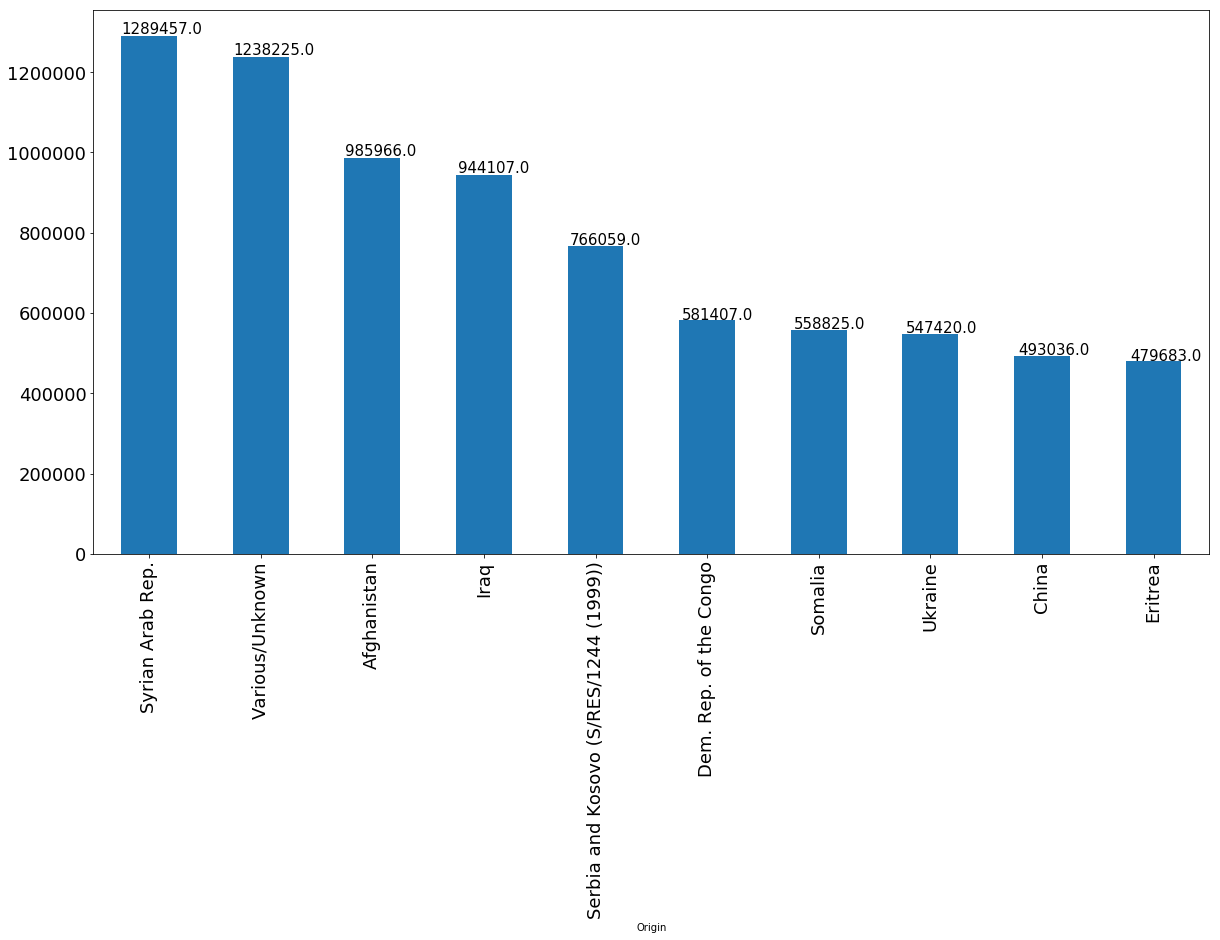

In [15]:
# Somalia has the highest number of people wants to migrate
plot_top_origin = data_top_origin.plot.bar(figsize=(20,10), fontsize=18)
for p in plot_top_origin.patches:
    plot_top_origin.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=15)

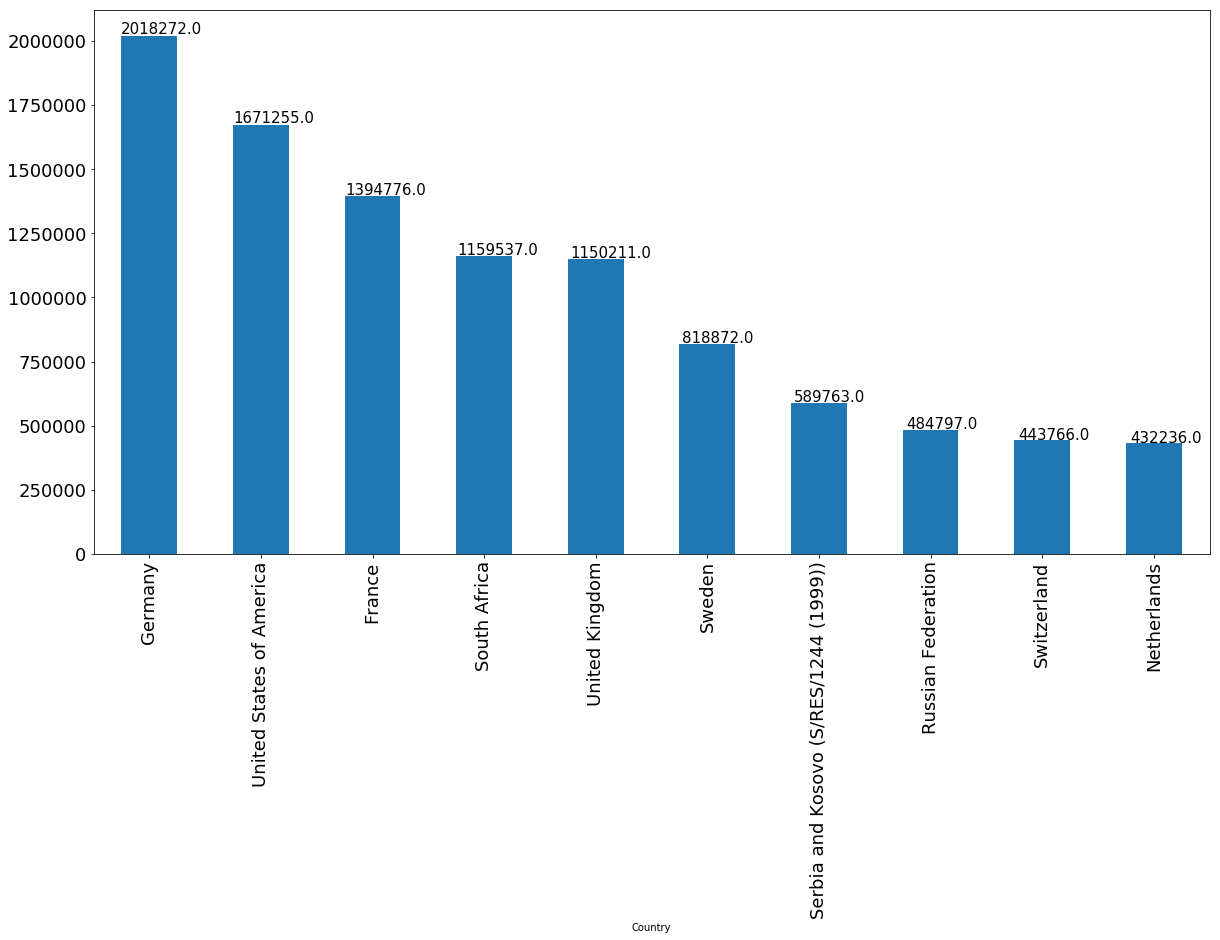

In [16]:
data_top_asylum = data_top_asylum.nlargest(10)
# Most refugee wants to mugrate to USA
plot_top_asylum = data_top_asylum.plot.bar(figsize=(20,10), fontsize=18)
for p in plot_top_asylum.patches:
    plot_top_asylum.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=15)

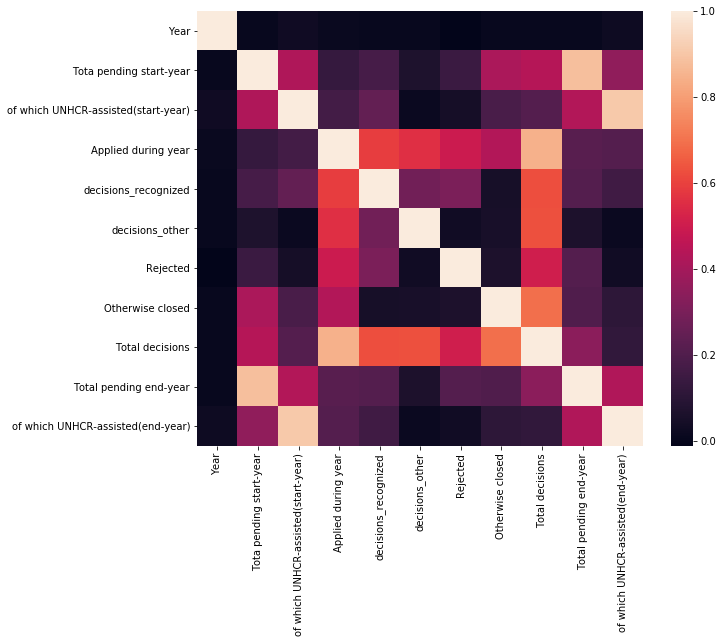

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = data[data['Country / territory of asylum/residence'] == 'United States of America'].corr()
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [18]:
data.corr()

,Year,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
Year,1.000000,0.008753,0.029755,0.013757,0.012138,0.008841,-0.011048,0.010268,0.010475,0.012440,0.027431
Tota pending start-year,0.008753,1.000000,0.425661,0.132142,0.175586,0.069058,0.143274,0.416504,0.440080,0.884060,0.353197
of which UNHCR-assisted(start-year),0.029755,0.425661,1.000000,0.168167,0.245968,0.018335,0.045695,0.185573,0.210743,0.431901,0.905439
Applied during year,0.013757,0.132142,0.168167,1.000000,0.590092,0.561579,0.498287,0.433873,0.845992,0.219614,0.213239
decisions_recognized,0.012138,0.175586,0.245968,0.590092,1.000000,0.282460,0.305040,0.048332,0.624874,0.213745,0.159597
decisions_other,0.008841,0.069058,0.018335,0.561579,0.282460,1.000000,0.033891,0.054450,0.631836,0.064015,0.017735
Rejected,-0.011048,0.143274,0.045695,0.498287,0.305040,0.033891,1.000000,0.066453,0.508581,0.213185,0.036074
Otherwise closed,0.010268,0.416504,0.185573,0.433873,0.048332,0.054450,0.066453,1.000000,0.693435,0.200220,0.107454
Total decisions,0.010475,0.440080,0.210743,0.845992,0.624874,0.631836,0.508581,0.693435,1.000000,0.341665,0.122594
Total pending end-year,0.012440,0.884060,0.431901,0.219614,0.213745,0.064015,0.213185,0.200220,0.341665,1.000000,0.428889
